# ML Project2: Viva

## Project Title - Telecom customer segmentation 

### Required Libraries

In [1]:
#for data analysis
import pandas as pd
import numpy as np

#for data visulalization
import matplotlib.pyplot as plt
import seaborn as sns

#for k means clustering
from sklearn.cluster import KMeans

#feature scaling
from sklearn.preprocessing import StandardScaler

#silhouette
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm


#load encoder
from sklearn import preprocessing


#to avoid warning
import warnings
warnings.simplefilter("ignore")

### Import data

In [42]:
#read the data
tele_cust = pd.read_csv("Telco_Customer_Churn_seg-26bb61e7-b255-40bc-a5c6-418943c39aef.csv")
tele_cust_c = tele_cust  #make a copy of original data

In [43]:
tele_cust_c.head()  #preview of data

,tenure,PhoneService,InternetService,MonthlyCharges
0,1,No,DSL,29.85
1,34,Yes,DSL,56.95
2,2,Yes,DSL,53.85
3,45,No,DSL,42.30
4,2,Yes,Fiber optic,70.70


### Data Standardization

In [44]:
#retrieve only numeric features # we have use StandardScaler for feature scaling

df_num = tele_cust_c.select_dtypes('number')
std_sacle = StandardScaler()
df_scale = std_sacle.fit_transform(df_num)

### Finding the good value of K for the model using Elbow Method and silhouette score

#### Elbow Method

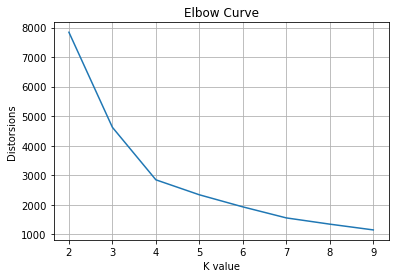

In [46]:
d = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_scale)
    d.append(kmeans.inertia_)
plt.plot(range(2,10),d)
plt.grid(True)
plt.xlabel("K value")
plt.ylabel("Distorsions")
plt.title("Elbow Curve");

From the Elbow method, the optimal value of K = 4

#### Silhouette score

For n_clusters = 2 The average silhouette_score is : 0.4108687780176224
For n_clusters = 3 The average silhouette_score is : 0.4464575408072121
For n_clusters = 4 The average silhouette_score is : 0.4761776833281009
For n_clusters = 5 The average silhouette_score is : 0.43000545361116776
For n_clusters = 6 The average silhouette_score is : 0.41617853922533116
For n_clusters = 7 The average silhouette_score is : 0.4340007477336665


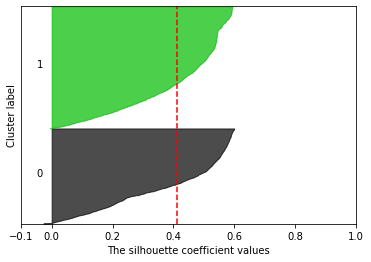

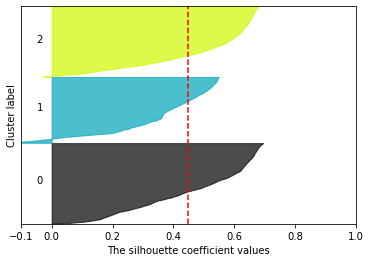

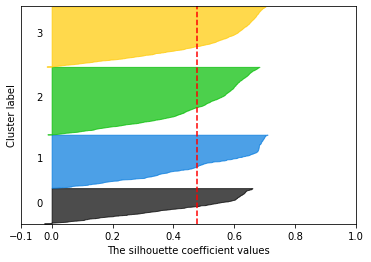

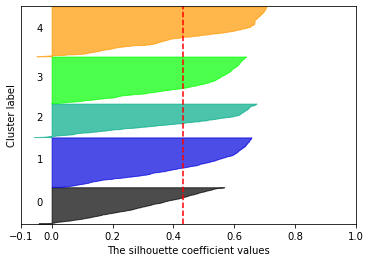

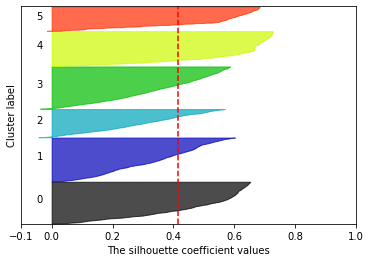

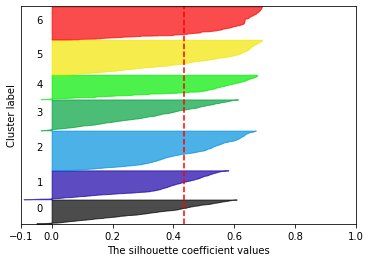

In [47]:

range_n_clusters = [2, 3, 4, 5, 6, 7]

for n_clusters in range_n_clusters:
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(df_scale) + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_scale)
    silhouette_avg = silhouette_score(df_scale, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

# Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_scale, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        
        ax1.fill_betweenx(np.arange(y_lower, y_upper),0, ith_cluster_silhouette_values,facecolor=color, edgecolor=color, alpha=0.7)
 
 # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
 # Compute the new y_lower for next plot
        y_lower = y_upper + 10 # 10 for the 0 samples
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
 # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([]) # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.show()

The silhouette give the optimal value of K= 4, For n_clusters = 4 The average silhouette_score is : 0.4761776833281009

We find from both methods, K=4 is the optimum value.

### K Means clustering model

#### Building the Model using K=4

In [48]:
# K Means clustering model: Build the model
Kmeans_model = KMeans(n_clusters=4)
Kmeans_model.fit(df_scale)   #fir the model
cluster = Kmeans_model.labels_

In [49]:
#add new feature to the data

tele_cust_c["Cluster"]  = cluster

In [50]:
##display total value  count of each clusters
tele_cust_c["Cluster"].value_counts()

0    2204
1    1952
2    1732
3    1155
Name: Cluster, dtype: int64

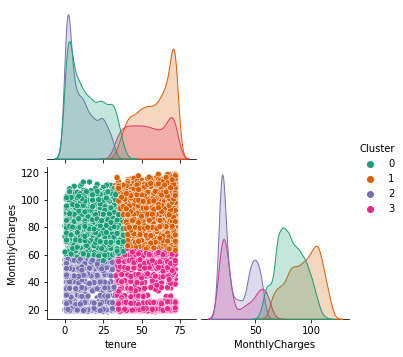

In [51]:
#plot the results
sns.pairplot(tele_cust_c, kind = 'scatter', hue='Cluster', corner = True, palette ='Dark2')
plt.show()

In [61]:
#Display how the customers are clustered
for i in tele_cust_c["Cluster"].unique():
    D = tele_cust_c[["MonthlyCharges","Cluster"]] [tele_cust_c["Cluster"]==i]
    print("MonthlyCharges of customer", i,"==>\n")

    print(D.MonthlyCharges.unique(), "\n")

MonthlyCharges of customer 2 ==>

[29.85 53.85 29.75 49.95 18.95 55.2  39.65 19.8  20.15 30.2  20.2  45.25
 49.55 20.75 49.25 54.4  49.05 54.65 50.55 33.75 21.05 19.45 24.3  30.15
 20.7  50.7  20.85 19.75 35.45 44.35 19.6  45.65 19.7  25.7  56.   20.6
 20.4  20.55 29.95 45.3  24.8  51.8  30.4  19.65 24.1  46.   25.25 20.
 50.05 19.35 50.6  25.15 29.6  54.8  48.55 40.2  19.85 44.6  45.   41.15
 49.85 55.   55.15 51.2  25.4  44.85 20.25 19.25 44.8  48.6  35.9  19.2
 44.95 41.9  54.1  30.75 19.15 35.75 25.35 50.65 19.95 44.   44.3  19.9
 20.05 40.7  53.45 45.4  44.45 55.05 55.95 20.65 53.6  52.55 43.75 28.45
 54.3  51.6  21.1  19.55 45.55 25.6  49.3  23.6  40.4  19.   20.1  45.6
 54.85 48.85 34.55 20.35 45.7  24.25 24.85 34.7  49.9  20.45 50.15 50.35
 45.35 21.25 26.25 44.05 20.8  35.8  40.3  54.75 52.2  25.55 44.4  30.85
 33.15 50.8  20.5  26.4  34.8  19.3  24.6  19.5  56.4  33.6  55.1  44.7
 56.75 29.8  43.8  26.1  49.5  53.65 40.05 54.35 49.15 54.25 50.25 43.65
 35.5  39.5  55.7  54.  

##### Interpretation

From the above pair plot graph:

1. In cluster no. 2, all the telecom customer whose tenure is 1 to 25 and Monthly chargers is from 18 to 60.
2. In cluster no. 1, all the telecom customer whose tenure is 35 to 75 and Monthly chargers is from 20 to 65.
3. In cluster no. 0, all the telecom customer whose tenure is 1 to 35 and Monthly chargers is from 65 to 111.
4. In cluster no. 3, all the telecom customer whose tenure is 32 to 75 and Monthly chargers is from 63 to 1120.

We can plan for each cluster like cluster 0, we can offer talktimes offer on recharge, for cluster 1, provide the mobile recharge with sms free and so no.